# Modeling - Bank Marketing Dataset

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

In [43]:
bank = pd.read_csv("bank.csv")

In [44]:
bank_01 = pd.read_csv("bank.csv")

In [45]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [46]:
bank_01.shape

(11162, 17)

In [47]:
#pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [48]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## EDA

In [49]:
print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


In [50]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# Dependent Variable - Deposit Distribution

In [51]:
bank["deposit"].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

## Independent Variable - EDA

<AxesSubplot:xlabel='poutcome'>

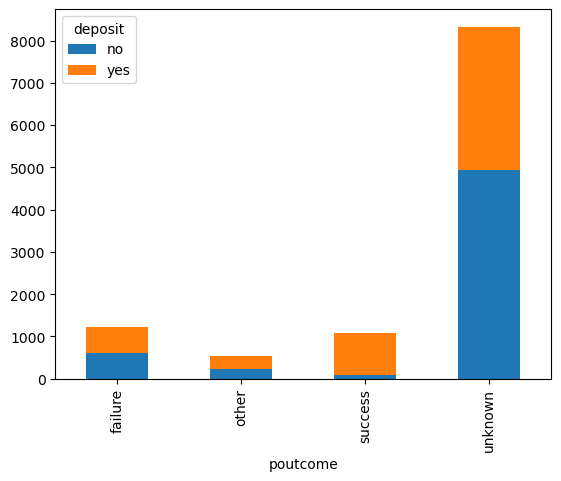

In [52]:
# bar chart for poutcome
types = bank.groupby("poutcome")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

<AxesSubplot:xlabel='month'>

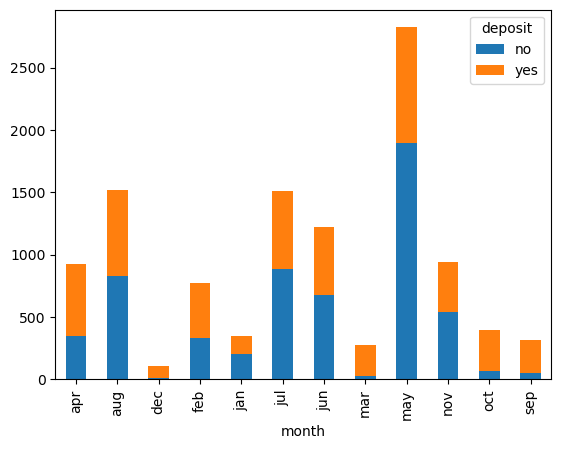

In [53]:
#bar chart for month
types = bank.groupby("month")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

<AxesSubplot:xlabel='contact'>

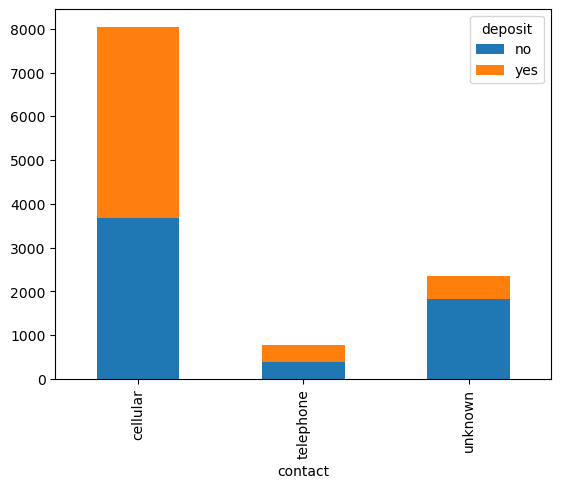

In [54]:
# group by contact to display bar chart
types = bank.groupby("contact")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')


<AxesSubplot:xlabel='loan'>

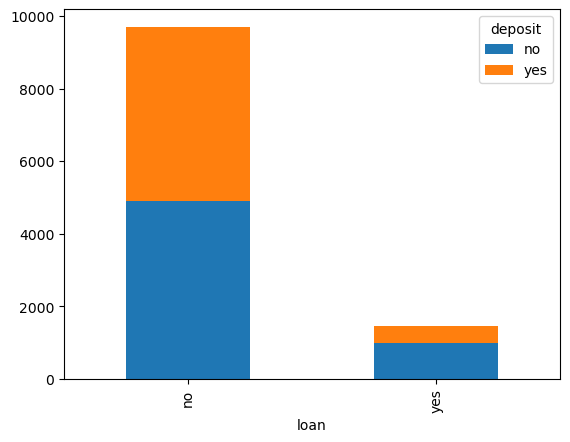

In [55]:
# group by loan to display bar chart
types = bank.groupby("loan")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

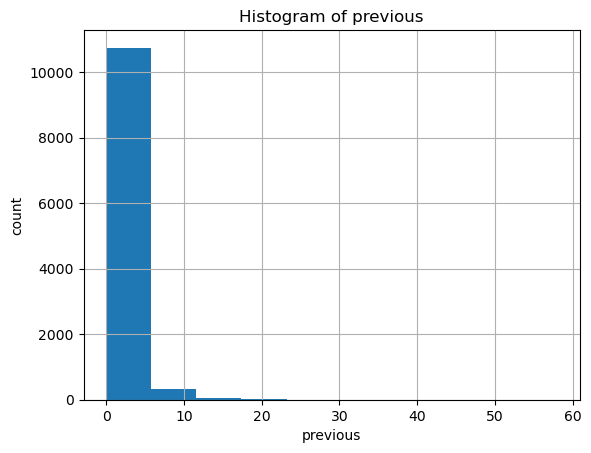

In [56]:
#histogram of previous
bank['previous'].hist()
plt.title('Histogram of previous')
plt.ylabel('count')
plt.xlabel('previous');
plt.show()

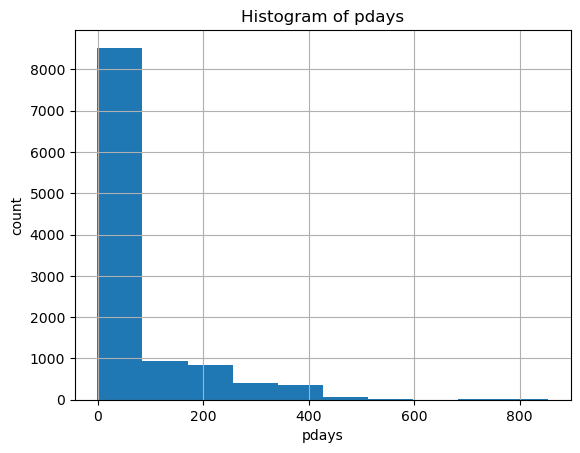

In [57]:
#histogram of pdays
bank['pdays'].hist()
plt.title('Histogram of pdays')
plt.ylabel('count')
plt.xlabel('pdays');
plt.show()

## Preprocessing

In [58]:
# replacing yes and no from default column by 1 and 0 to convert categorical feature to numerical feature
bank['deposit'].replace(to_replace='no', value=1, inplace=True)
bank['deposit'].replace(to_replace='yes',  value=0, inplace=True)
bank['default'].head()

0    no
1    no
2    no
3    no
4    no
Name: default, dtype: object

In [59]:
# replacing yes and no from loan column by 1 and 0 to convert categorical feature to numerical feature
bank['loan'].replace(to_replace='no', value=1, inplace=True)
bank['loan'].replace(to_replace='yes',  value=0, inplace=True)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,1,unknown,5,may,1042,1,-1,0,unknown,0
1,56,admin.,married,secondary,no,45,no,1,unknown,5,may,1467,1,-1,0,unknown,0
2,41,technician,married,secondary,no,1270,yes,1,unknown,5,may,1389,1,-1,0,unknown,0
3,55,services,married,secondary,no,2476,yes,1,unknown,5,may,579,1,-1,0,unknown,0
4,54,admin.,married,tertiary,no,184,no,1,unknown,5,may,673,2,-1,0,unknown,0


In [60]:
# replacing yes and no from default column by 1 and 0 to convert categorical feature to numerical feature
bank['default'].replace(to_replace='no', value=1, inplace=True)
bank['default'].replace(to_replace='yes',  value=0, inplace=True)
bank['default'].head()

0    1
1    1
2    1
3    1
4    1
Name: default, dtype: int64

In [61]:
bank["loan"].value_counts()

1    9702
0    1460
Name: loan, dtype: int64

In [62]:
# replacing yes and no from housing column by 1 and 0 to convert categorical feature to numerical feature
bank['housing'].replace(to_replace='no', value=1, inplace=True)
bank['housing'].replace(to_replace='yes',  value=0, inplace=True)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,1,2343,0,1,unknown,5,may,1042,1,-1,0,unknown,0
1,56,admin.,married,secondary,1,45,1,1,unknown,5,may,1467,1,-1,0,unknown,0
2,41,technician,married,secondary,1,1270,0,1,unknown,5,may,1389,1,-1,0,unknown,0
3,55,services,married,secondary,1,2476,0,1,unknown,5,may,579,1,-1,0,unknown,0
4,54,admin.,married,tertiary,1,184,1,1,unknown,5,may,673,2,-1,0,unknown,0


In [63]:
bank_01['marital'].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [64]:
# one hot encoding for marital feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(bank['marital'])
bank = bank.drop('marital',axis = 1)
bank = bank.join(one_hot)

In [65]:
bank.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,divorced,married,single
0,59,admin.,secondary,1,2343,0,1,unknown,5,may,1042,1,-1,0,unknown,0,0,1,0
1,56,admin.,secondary,1,45,1,1,unknown,5,may,1467,1,-1,0,unknown,0,0,1,0
2,41,technician,secondary,1,1270,0,1,unknown,5,may,1389,1,-1,0,unknown,0,0,1,0
3,55,services,secondary,1,2476,0,1,unknown,5,may,579,1,-1,0,unknown,0,0,1,0
4,54,admin.,tertiary,1,184,1,1,unknown,5,may,673,2,-1,0,unknown,0,0,1,0


In [66]:
bank = bank.drop('divorced',axis = 1)

In [67]:
bank.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,married,single
0,59,admin.,secondary,1,2343,0,1,unknown,5,may,1042,1,-1,0,unknown,0,1,0
1,56,admin.,secondary,1,45,1,1,unknown,5,may,1467,1,-1,0,unknown,0,1,0
2,41,technician,secondary,1,1270,0,1,unknown,5,may,1389,1,-1,0,unknown,0,1,0
3,55,services,secondary,1,2476,0,1,unknown,5,may,579,1,-1,0,unknown,0,1,0
4,54,admin.,tertiary,1,184,1,1,unknown,5,may,673,2,-1,0,unknown,0,1,0


## Nominal Feature - Education

In [68]:
bank['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [69]:
education_dic = {'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3}

In [70]:
bank["education_l1"] = bank["education"].apply(lambda x: education_dic.get(x))

In [71]:
bank["education_l1"].value_counts()

2    5476
3    3689
1    1500
0     497
Name: education_l1, dtype: int64

In [72]:
bank = bank.drop('education',axis = 1)

## Nominal Feature or Categorical Feature - Work

In [73]:
bank['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [74]:
one_hot = pd.get_dummies(bank['job'])
bank = bank.drop('job',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('unknown',axis = 1)
bank.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,married,single,education_l1,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,59,1,2343,0,1,unknown,5,may,1042,1,-1,0,unknown,0,1,0,2,1,0,0,0,0,0,0,0,0,0,0
1,56,1,45,1,1,unknown,5,may,1467,1,-1,0,unknown,0,1,0,2,1,0,0,0,0,0,0,0,0,0,0
2,41,1,1270,0,1,unknown,5,may,1389,1,-1,0,unknown,0,1,0,2,0,0,0,0,0,0,0,0,0,1,0
3,55,1,2476,0,1,unknown,5,may,579,1,-1,0,unknown,0,1,0,2,0,0,0,0,0,0,0,1,0,0,0
4,54,1,184,1,1,unknown,5,may,673,2,-1,0,unknown,0,1,0,3,1,0,0,0,0,0,0,0,0,0,0


In [75]:
bank['contact'].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [76]:
# one hot encoding for contact feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(bank['contact'])
bank = bank.drop('contact',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('unknown',axis = 1)
bank.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit,married,single,education_l1,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,cellular,telephone
0,59,1,2343,0,1,5,may,1042,1,-1,0,unknown,0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0
1,56,1,45,1,1,5,may,1467,1,-1,0,unknown,0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0
2,41,1,1270,0,1,5,may,1389,1,-1,0,unknown,0,1,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0
3,55,1,2476,0,1,5,may,579,1,-1,0,unknown,0,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0
4,54,1,184,1,1,5,may,673,2,-1,0,unknown,0,1,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
bank['poutcome'].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [78]:
one_hot = pd.get_dummies(bank['poutcome'])
bank = bank.drop('poutcome',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('other',axis = 1)
bank.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit,married,single,education_l1,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,cellular,telephone,failure,success,unknown
0,59,1,2343,0,1,5,may,1042,1,-1,0,0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,56,1,45,1,1,5,may,1467,1,-1,0,0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,41,1,1270,0,1,5,may,1389,1,-1,0,0,1,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,55,1,2476,0,1,5,may,579,1,-1,0,0,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,54,1,184,1,1,5,may,673,2,-1,0,0,1,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [79]:
bank = bank.drop('month',axis = 1)

In [80]:
print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            11162 non-null  int64
 1   default        11162 non-null  int64
 2   balance        11162 non-null  int64
 3   housing        11162 non-null  int64
 4   loan           11162 non-null  int64
 5   day            11162 non-null  int64
 6   duration       11162 non-null  int64
 7   campaign       11162 non-null  int64
 8   pdays          11162 non-null  int64
 9   previous       11162 non-null  int64
 10  deposit        11162 non-null  int64
 11  married        11162 non-null  uint8
 12  single         11162 non-null  uint8
 13  education_l1   11162 non-null  int64
 14  admin.         11162 non-null  uint8
 15  blue-collar    11162 non-null  uint8
 16  entrepreneur   11162 non-null  uint8
 17  housemaid      11162 non-null  uint8
 18  management     11162 non-null  uint8
 19  reti

## Modeling

## Decision Tree

In [92]:
X = bank.drop('deposit',axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,bank['deposit'],test_size=0.300, random_state=3)

In [99]:
dt = DecisionTreeClassifier()

parameters = {'max_depth':[5,6,7,8,9,10,11,12,13,14,15],
            'min_samples_leaf':[3,4,5],
            'min_samples_split':[2,3,4,5],
            'criterion':['gini','entropy']}

In [100]:
clf = GridSearchCV(dt,parameters,scoring='accuracy',verbose=True)
best_clf = clf.fit(X_train,y_train)

Fitting 5 folds for each of 264 candidates, totalling 1320 fits


In [101]:
pred_train = best_clf.predict(X_train)
pred = best_clf.predict(X_test)
accDT = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreDT = roc_auc_score(y_test,  y_pred_prob[:,1])
fprDT, tprDT, thresholds = roc_curve(y_test, y_pred_prob[:,1] )

print("Train")
print(confusion_matrix(y_train,pred_train))
print(classification_report(y_train,pred_train))
print("Test")
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

print("AUC score for Decision Tree is ",aucScoreDT)
print("Test Accuracy score for DT is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for DT is ",accuracy_score(y_train, predT))
print("Best parameters for DT are ",best_clf.best_params_)

Train
[[3369  345]
 [ 888 3211]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      3714
           1       0.90      0.78      0.84      4099

    accuracy                           0.84      7813
   macro avg       0.85      0.85      0.84      7813
weighted avg       0.85      0.84      0.84      7813

Test
[[1348  227]
 [ 475 1299]]
              precision    recall  f1-score   support

           0       0.74      0.86      0.79      1575
           1       0.85      0.73      0.79      1774

    accuracy                           0.79      3349
   macro avg       0.80      0.79      0.79      3349
weighted avg       0.80      0.79      0.79      3349

AUC score for Decision Tree is  0.8613224530699163
Test Accuracy score for DT is  0.7903851896088384
Train Accuracy score for DT is  0.8421861000895943
Best parameters for DT are  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 4}


In [102]:
dt_ft_imp = best_clf.best_estimator_.tree_.compute_feature_importances(normalize=False)

<AxesSubplot:>

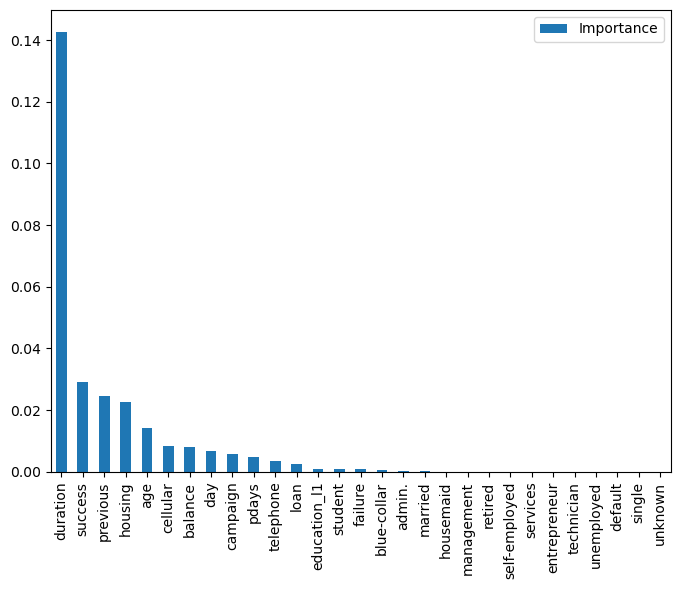

In [103]:
feat_importances = pd.DataFrame(dt_ft_imp, index = X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

## Random Forest

In [104]:
rf = RandomForestClassifier()

parameters={
 #'max_features': ['log2', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [3, 5],
 #'criterion':['gini','entropy'],
 #'n_estimators': [100, 200]
 'n_estimators': [2000]}

In [ ]:
rf = GridSearchCV(estimator = rf, param_grid = parameters,scoring='accuracy', cv = 5, verbose = True)
best_rf = rf.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
# Training Random Forest
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report
# get best parameters for retraining

pred_train = best_rf.predict(X_train)
pred = best_rf.predict(X_test)
accRF = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreRF = roc_auc_score(y_test,  y_pred_prob[:,1])
fprRF, tprRF, thresholds = roc_curve(y_test, y_pred_prob[:,1] )

print("Train")
print(confusion_matrix(y_train,pred_train))
print(classification_report(y_train,pred_train))
print("Test")
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

print("AUC score for Random Forest is ",aucScoreRF)
print("Test Accuracy score for Random Forest is ",accuracy_score(y_test, pred))
predT=best_rf.predict(X_train)

print("Train Accuracy score for Random Forest is ",accuracy_score(y_train, predT))
print("Best parameters for Random Forest are ",best_rf.best_params_)

In [ ]:
dt_ft_imp = best_rf.best_estimator_.feature_importances_

In [ ]:
feat_importances = pd.DataFrame(dt_ft_imp, index = X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

## Gradient Boosting Trees

In [ ]:
gb = GradientBoostingClassifier()

parameters={
 #'max_features': ['log2', 'sqrt'],
 'max_depth': [3, 5],
 'learning_rate':[0.1],
 'n_estimators': [1000]}

In [ ]:
gb = GridSearchCV(estimator = gb, param_grid = parameters,scoring='accuracy', cv = 5, verbose = True)
best_gb = gb.fit(X_train,y_train)

In [ ]:
# Training GBT Forest
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report
# get best parameters for retraining

pred_train = best_gb.predict(X_train)
pred = best_gb.predict(X_test)
accRF = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreRF = roc_auc_score(y_test,  y_pred_prob[:,1])
fprRF, tprRF, thresholds = roc_curve(y_test, y_pred_prob[:,1] )

print("Train")
print(confusion_matrix(y_train,pred_train))
print(classification_report(y_train,pred_train))
print("Test")
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

print("AUC score for GBT is ",aucScoreRF)
print("Test Accuracy score for GBT is ",accuracy_score(y_test, pred))
predT = best_gb.predict(X_train)

print("Train Accuracy score for Random Forest is ",accuracy_score(y_train, predT))
print("Best parameters for Random Forest are ",best_gb.best_params_)

In [ ]:
dt_ft_imp = best_gb.best_estimator_.feature_importances_

In [ ]:
feat_importances = pd.DataFrame(dt_ft_imp, index = X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))